In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recentdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recentdate

('2017-08-23',)

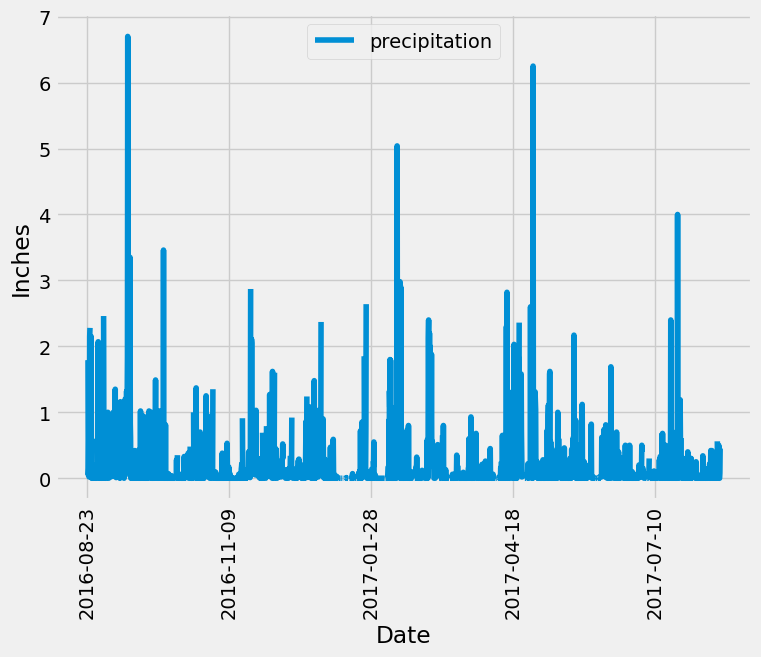

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recentdate = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
year_from_lastdate = (recentdate - dt.timedelta(days = 365))

# Perform a query to retrieve the data and precipitation scores
prcpquery = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_from_lastdate).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prcpquery, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90,figsize=(8,6))
plt.ylabel("Inches")
plt.xlabel("Date")
plt.legend(loc = 'upper center')
plt.show()

In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data
summaryst = df.describe()
summaryst

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station.distinct())).scalar()

print(f"[({total_stations},)]")

[(9,)]


In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for station, count in most_active_stations:
    print(f"[('{station}', {count})]")

[('USC00519281', 2772)]
[('USC00519397', 2724)]
[('USC00513117', 2709)]
[('USC00519523', 2669)]
[('USC00516128', 2612)]
[('USC00514830', 2202)]
[('USC00511918', 1979)]
[('USC00517948', 1372)]
[('USC00518838', 511)]


In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperatures = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
lowest_temp, highest_temp, average_temp = temperatures[0]
station_id = 'USC00519281'


print(f"[({lowest_temp},{highest_temp},{average_temp})]")

[(54.0,85.0,71.66378066378067)]


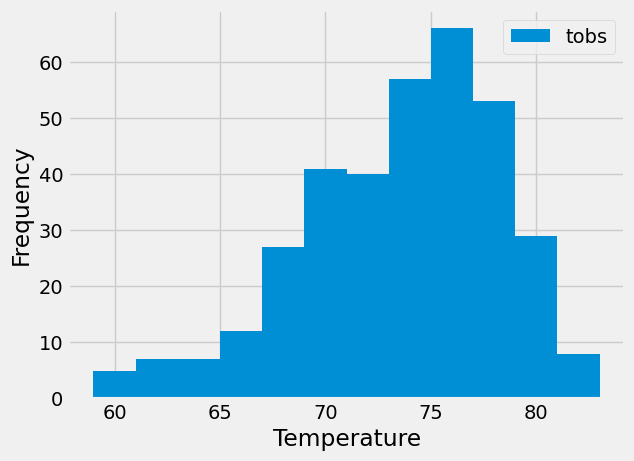

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12 = session.query(Measurement.date, Measurement.tobs).filter_by(station = "USC00519281").\
    filter(Measurement.date >= year_from_lastdate).all()
#convert to dataframe to plot data
last12df = pd.DataFrame(last12)
#plot
last12df.plot(kind = 'hist', bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()